# Obesity prediction

The Obesity Prediction Dataset is a comprehensive compilation of attributes spanning individuals' demographics, lifestyle habits, and health indicators, meticulously designed to aid in forecasting obesity prevalence. With crucial columns including age, gender, height, weight, BMI, physical activity level, and obesity category, this dataset serves as an invaluable asset for researchers, data scientists, and healthcare professionals. Boasting 1000 meticulously documented data records, its completeness, credibility, and compatibility have earned it a stellar Kaggle usability rating of 10.0. Thus, this dataset is invaluable, providing crucial insights into the various factors potentially influencing obesity.

https://www.kaggle.com/datasets/mrsimple07/obesity-prediction

*The 7 Columns in the dataset*:
1. **Age**: The age of the individual, expressed in years. *(discrete numerical value)*
2. **Gender**: The gender of the individual, categorized as male or female. *( nominal categorical value)*
3. **Height**: The height of the individual, measured in centimeters. *(continuous numerical values)*
4. **Weight**: The weight of the individual, measured in kilograms. *(continuous numerical values)*
5. **BMI**: A calculated metric derived from the individual's weight and height.*(continuous numerical value)*
6. **PhysicalActivityLevel**: This variable quantifies the individual's level of physical activity. *(continuous numerical value)*
7. **ObesityCategory**: Categorization of individuals based on their BMI into 3 different obesity categories[Normal weight, Overweight& Other]. *(ordinal categorical value)*

In [ ]:
!pip install catboost
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
url = 'https://drive.google.com/file/d/1cFFYKCLB_FyxOqcYMUELWND1vGKe8H8p/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
try:
    df = pd.read_csv(path)
except:
    print('Error')

df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


In [ ]:
total_rows = len(df)
total_columns = df.shape[1]
print("Total number of rows:", total_rows)
print("Total number of columns:", total_columns)


Total number of rows: 1000
Total number of columns: 7


In [ ]:
data_types = df.dtypes
print("Data types of columns:")
print(data_types)

Data types of columns:
Age                        int64
Gender                    object
Height                   float64
Weight                   float64
BMI                      float64
PhysicalActivityLevel      int64
ObesityCategory           object
dtype: object


In [ ]:
print(df.describe())

               Age       Height       Weight          BMI  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     49.857000   170.052417    71.205769    24.888317   
std      18.114267    10.309971    15.509849     6.193912   
min      18.000000   136.115719    26.065730     8.470572   
25%      35.000000   163.514205    61.129629    20.918068   
50%      50.000000   169.801665    71.929072    24.698647   
75%      66.000000   177.353596    81.133746    28.732132   
max      79.000000   201.419670   118.907366    50.791898   

       PhysicalActivityLevel  
count            1000.000000  
mean                2.534000  
std                 1.116284  
min                 1.000000  
25%                 2.000000  
50%                 3.000000  
75%                 4.000000  
max                 4.000000  


In [ ]:
df.dropna(axis=0, how='any', inplace=True)
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


# HISTOGRAM COUNT PLOTS

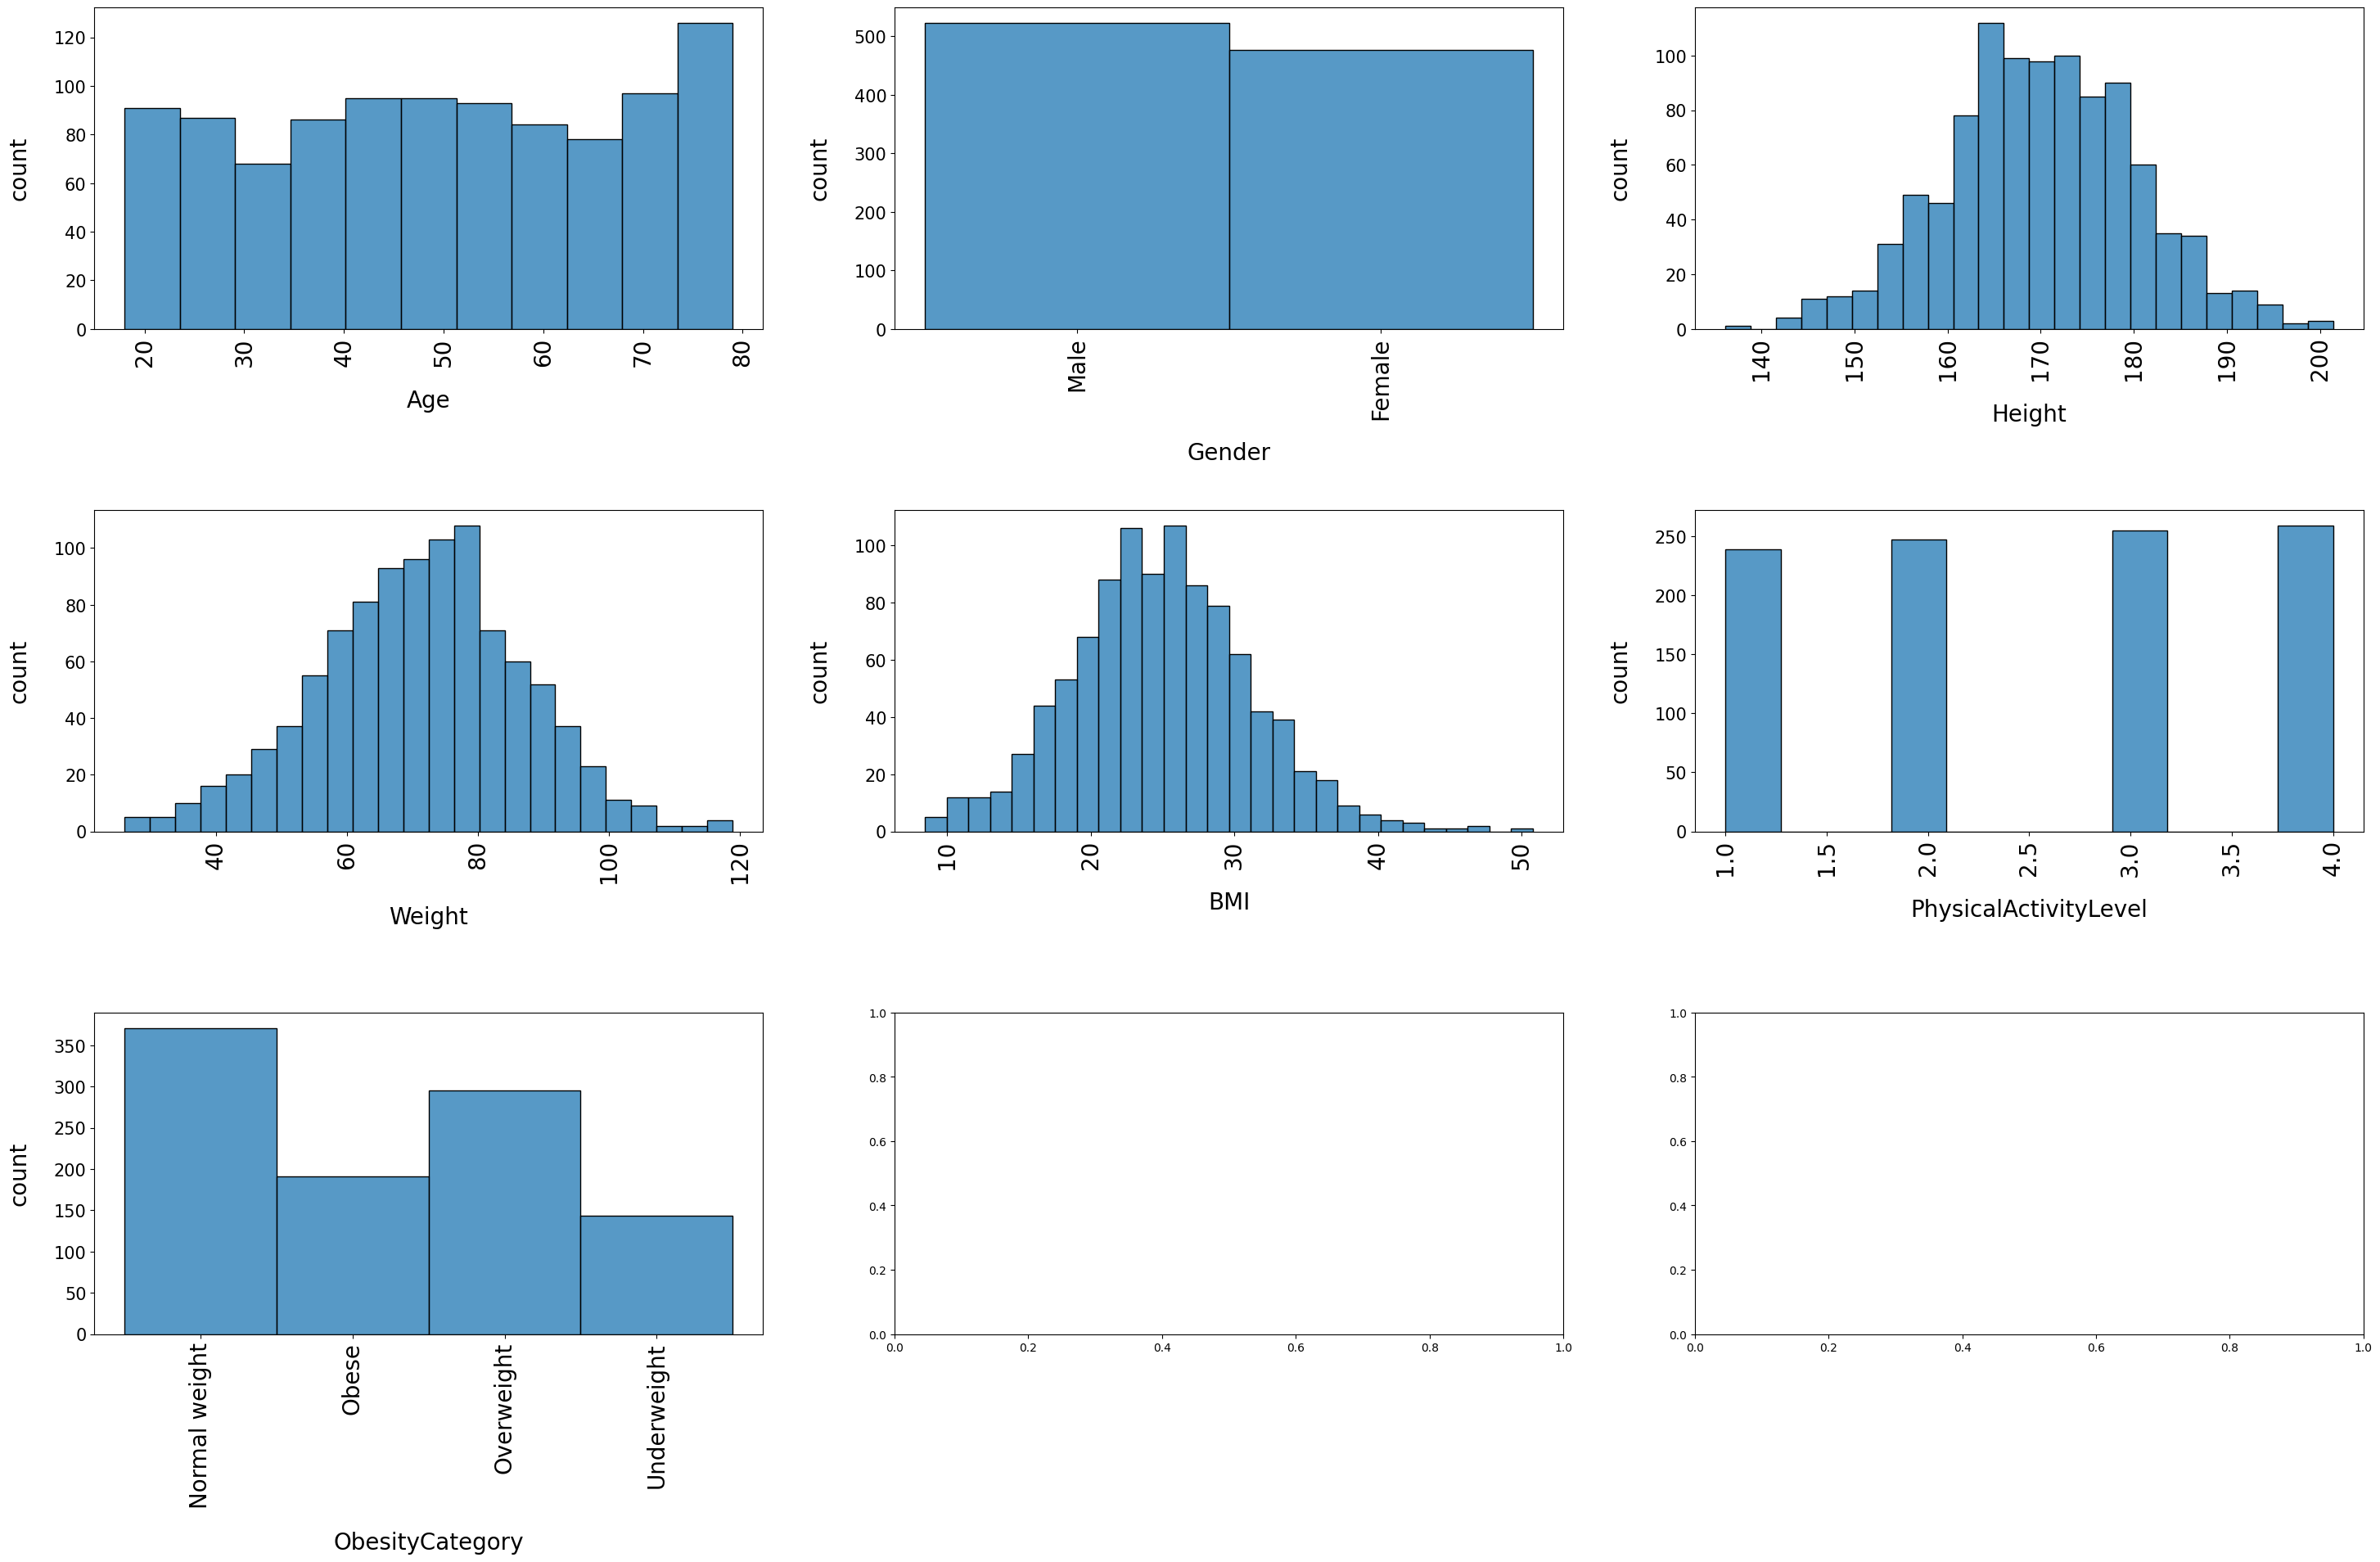

In [ ]:
selected_columns = ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel', 'ObesityCategory']
selected_df = df[selected_columns]
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(30, 20))
index = 0
ax = ax.flatten()
for col in selected_columns:
    if index >= len(ax):
        break
    g1 = sns.histplot(selected_df[col], ax=ax[index])
    g1.set_ylabel('count', fontsize=20, labelpad=20)  # Add labelpad here
    g1.set_xlabel(col, fontsize=20, labelpad=20)  # Add labelpad here
    ax[index].tick_params(axis="x", labelsize=20, rotation=90)
    ax[index].tick_params(axis="y", labelsize=15)
    index += 1
plt.tight_layout(pad=4.0, w_pad=4.0, h_pad=4.0)
plt.show()

# BOX PLOTS

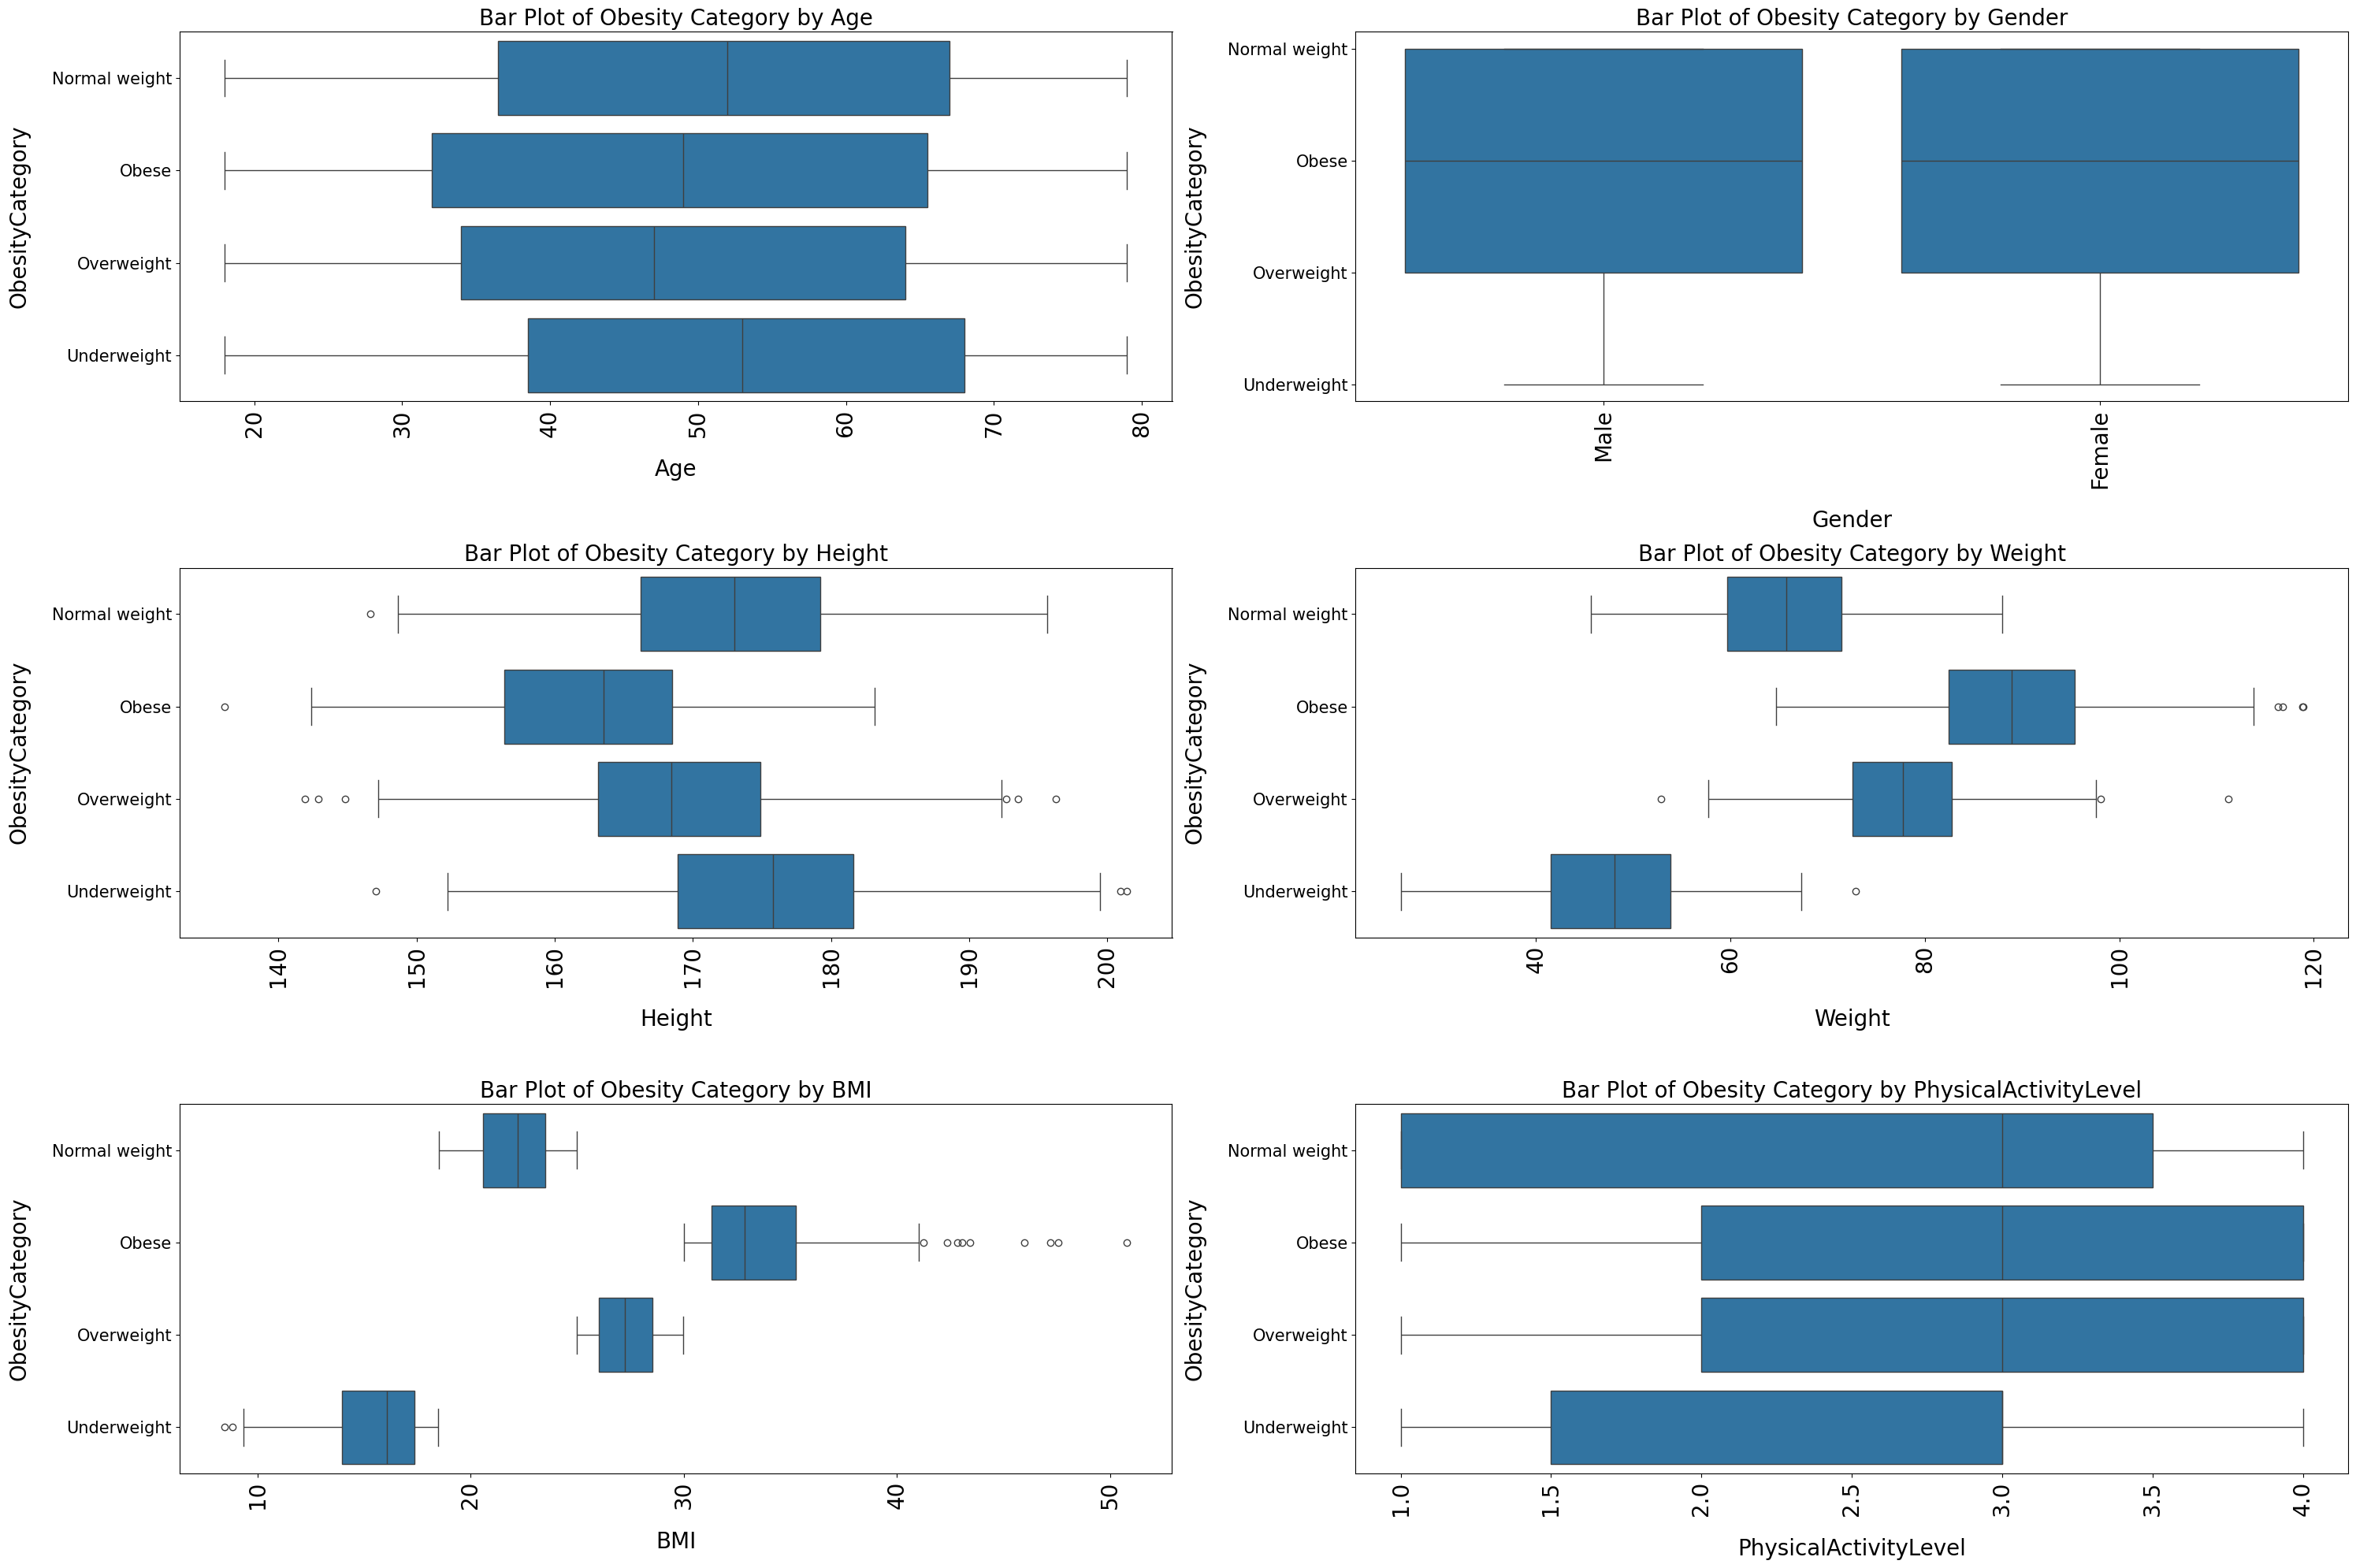

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(30, 20))

features_to_plot = ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
for i, feature in enumerate(features_to_plot):
    row = i // 2
    col = i % 2
    plot = sns.boxplot(x=feature, y='ObesityCategory', data=df, ax=axs[row, col])
    plot.set_title(f'Bar Plot of Obesity Category by {feature}', fontsize=20)
    plot.set_xlabel(feature, fontsize=20, labelpad=20)
    plot.set_ylabel('ObesityCategory', fontsize=20, labelpad=20)
    axs[row, col].tick_params(axis='x', rotation=90, labelsize=20)
    axs[row, col].tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()



In [ ]:
# lable encoding for 'Gender' and 'ObesityCategory' columns
encoder_label=LabelEncoder()
df['ObesityCategory']=encoder_label.fit_transform(df['ObesityCategory'])
df['Gender']=encoder_label.fit_transform(df['Gender'])
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0
...,...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4,2
996,35,0,165.076490,97.639771,35.830783,1,1
997,49,0,156.570956,78.804284,32.146036,1,1
998,64,1,164.192222,57.978115,21.505965,4,0


<Axes: >

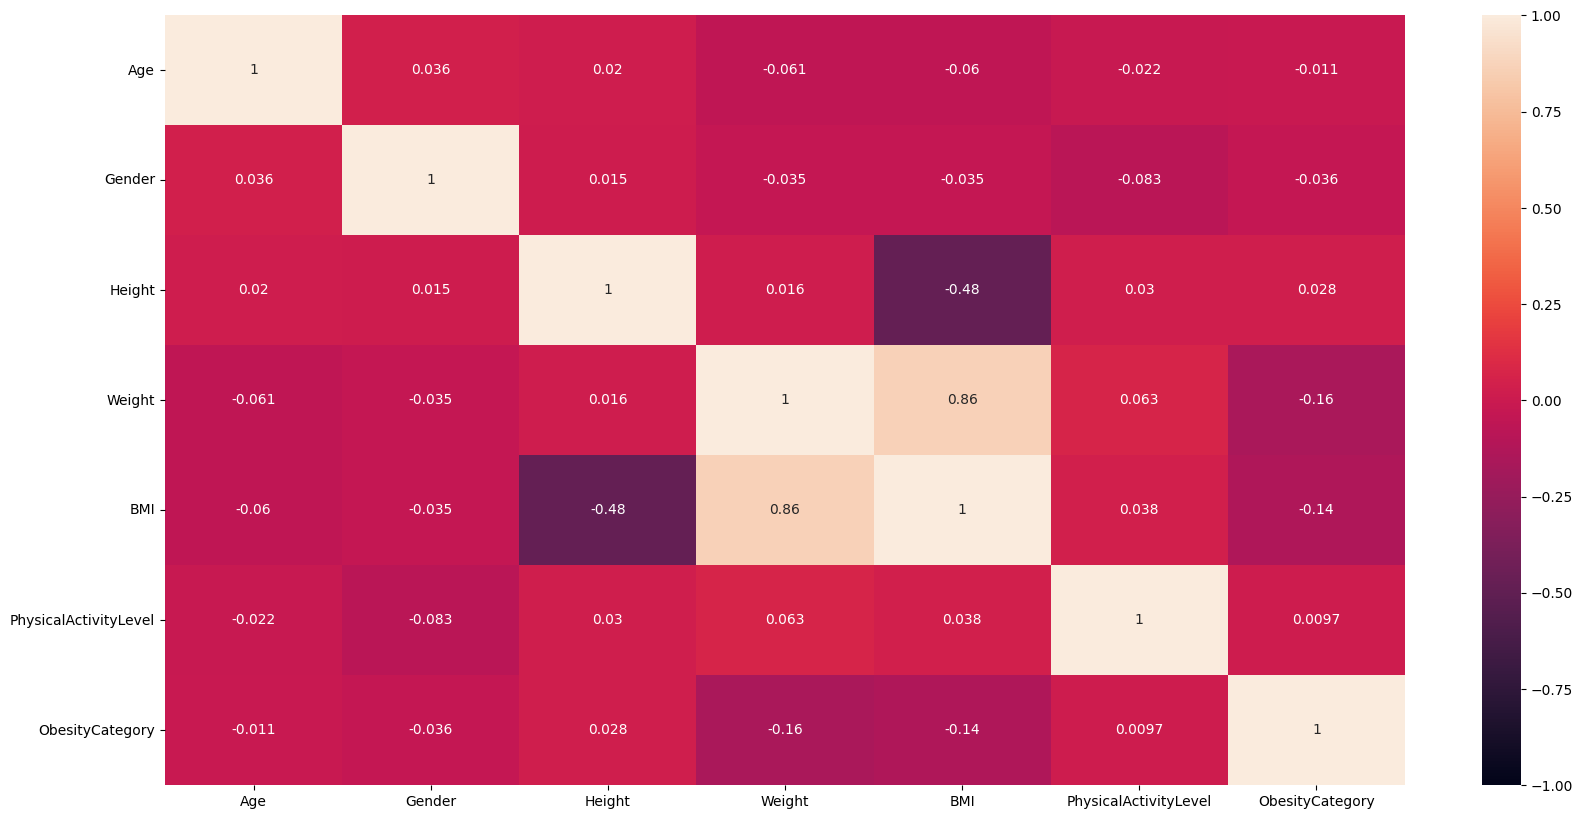

In [ ]:
myColors = ("red","white","blue")
cmap1 = clr.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
plt.figure(figsize=(20,10))
sns.heatmap(corr,mask = mask, vmin = -1, vmax = 1, annot=True)

In [ ]:
# Now compute the correlation matrix
correlation_table = df.corr()
correlation_table

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
Age,1.000000,0.036248,0.019647,-0.061400,-0.059971,-0.022308,-0.010917
Gender,0.036248,1.000000,0.015436,-0.034869,-0.035131,-0.083051,-0.036335
Height,0.019647,0.015436,1.000000,0.016033,-0.477091,0.030380,0.028463
Weight,-0.061400,-0.034869,0.016033,1.000000,0.861438,0.063406,-0.162656
BMI,-0.059971,-0.035131,-0.477091,0.861438,1.000000,0.038020,-0.139882
PhysicalActivityLevel,-0.022308,-0.083051,0.030380,0.063406,0.038020,1.000000,0.009728
ObesityCategory,-0.010917,-0.036335,0.028463,-0.162656,-0.139882,0.009728,1.000000


In [ ]:
X = df[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y = df['ObesityCategory']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

In [ ]:
models = [
    KNeighborsClassifier(),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    MLPClassifier(random_state=42),
    XGBClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=0),
    Perceptron(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

accuracy_scores = []
r2_scores = []
mse_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_scores.append(precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_scores.append(recall)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)
    print(f"\n{type(model).__name__} Accuracy Score: {accuracy:.3f}")
    print(f"{type(model).__name__} r2 Score: {r2:.3f}")
    print(f"{type(model).__name__} Mean Squared Error: {mse:.3f}")
    print(f"{type(model).__name__} Precision Score: {precision:.3f}")
    print(f"{type(model).__name__} Recall Score: {recall:.3f}")
    print(f"{type(model).__name__} f1 Score: {f1:.3f}")


KNeighborsClassifier Accuracy Score: 0.890
KNeighborsClassifier r2 Score: 0.690
KNeighborsClassifier Mean Squared Error: 0.345
KNeighborsClassifier Precision Score: 0.890
KNeighborsClassifier Recall Score: 0.890
KNeighborsClassifier f1 Score: 0.889

SVC Accuracy Score: 0.820
SVC r2 Score: 0.353
SVC Mean Squared Error: 0.720
SVC Precision Score: 0.855
SVC Recall Score: 0.820
SVC f1 Score: 0.805

DecisionTreeClassifier Accuracy Score: 1.000
DecisionTreeClassifier r2 Score: 1.000
DecisionTreeClassifier Mean Squared Error: 0.000
DecisionTreeClassifier Precision Score: 1.000
DecisionTreeClassifier Recall Score: 1.000
DecisionTreeClassifier f1 Score: 1.000

RandomForestClassifier Accuracy Score: 1.000
RandomForestClassifier r2 Score: 1.000
RandomForestClassifier Mean Squared Error: 0.000
RandomForestClassifier Precision Score: 1.000
RandomForestClassifier Recall Score: 1.000
RandomForestClassifier f1 Score: 1.000

AdaBoostClassifier Accuracy Score: 1.000
AdaBoostClassifier r2 Score: 1.000
A

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



MLPClassifier Accuracy Score: 0.945
MLPClassifier r2 Score: 0.838
MLPClassifier Mean Squared Error: 0.180
MLPClassifier Precision Score: 0.948
MLPClassifier Recall Score: 0.945
MLPClassifier f1 Score: 0.945

XGBClassifier Accuracy Score: 0.995
XGBClassifier r2 Score: 0.982
XGBClassifier Mean Squared Error: 0.020
XGBClassifier Precision Score: 0.995
XGBClassifier Recall Score: 0.995
XGBClassifier f1 Score: 0.995

CatBoostClassifier Accuracy Score: 1.000
CatBoostClassifier r2 Score: 1.000
CatBoostClassifier Mean Squared Error: 0.000
CatBoostClassifier Precision Score: 1.000
CatBoostClassifier Recall Score: 1.000
CatBoostClassifier f1 Score: 1.000

Perceptron Accuracy Score: 0.560
Perceptron r2 Score: -0.713
Perceptron Mean Squared Error: 1.905
Perceptron Precision Score: 0.374
Perceptron Recall Score: 0.560
Perceptron f1 Score: 0.445


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



GradientBoostingClassifier Accuracy Score: 1.000
GradientBoostingClassifier r2 Score: 1.000
GradientBoostingClassifier Mean Squared Error: 0.000
GradientBoostingClassifier Precision Score: 1.000
GradientBoostingClassifier Recall Score: 1.000
GradientBoostingClassifier f1 Score: 1.000


<ipython-input-14-8a995a0d46fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='coolwarm', ax=ax)


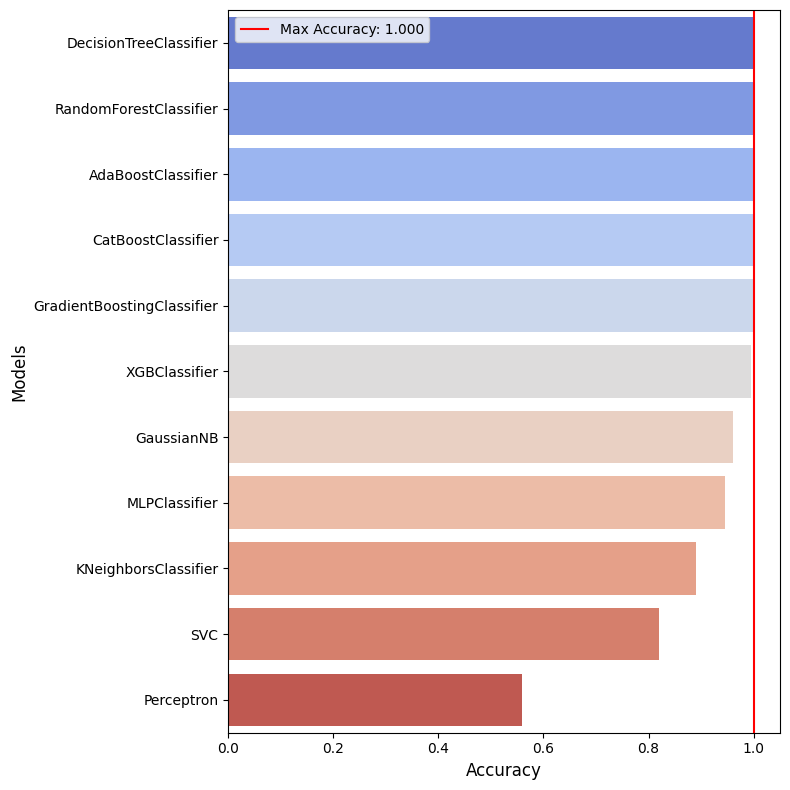

In [ ]:
accuracy_df = pd.DataFrame({'Model': [type(model).__name__ for model in models], 'Accuracy': accuracy_scores})

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='coolwarm', ax=ax)

ax.set_xlabel('Accuracy', fontsize=12)
ax.set_ylabel('Models', fontsize=12)

max_accuracy = accuracy_df['Accuracy'].max()
ax.axvline(max_accuracy, color='red', label=f'Max Accuracy: {max_accuracy:.3f}', linestyle='solid')

ax.legend()
plt.tight_layout()
plt.show()

<ipython-input-15-6ba41ff20616>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R-squared Score', y='Model', data=r2_df, palette='coolwarm', ax=ax)


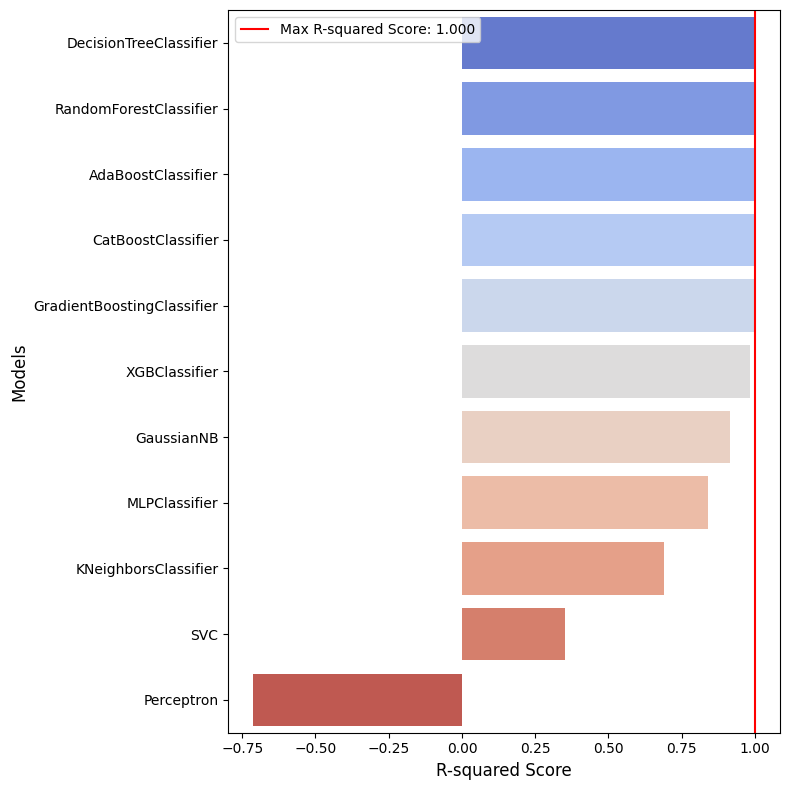

In [ ]:
r2_df = pd.DataFrame({'Model': [type(model).__name__ for model in models], 'R-squared Score': r2_scores})

r2_df = r2_df.sort_values(by='R-squared Score', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x='R-squared Score', y='Model', data=r2_df, palette='coolwarm', ax=ax)

ax.set_xlabel('R-squared Score', fontsize=12)
ax.set_ylabel('Models', fontsize=12)

max_r2 = r2_df['R-squared Score'].max()
ax.axvline(max_r2, color='red', label=f'Max R-squared Score: {max_r2:.3f}', linestyle='solid')

ax.legend()
plt.tight_layout()
plt.show()

<ipython-input-16-a9507d0bacb1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Squared Error', y='Model', data=mse_df, palette='coolwarm', ax=ax)


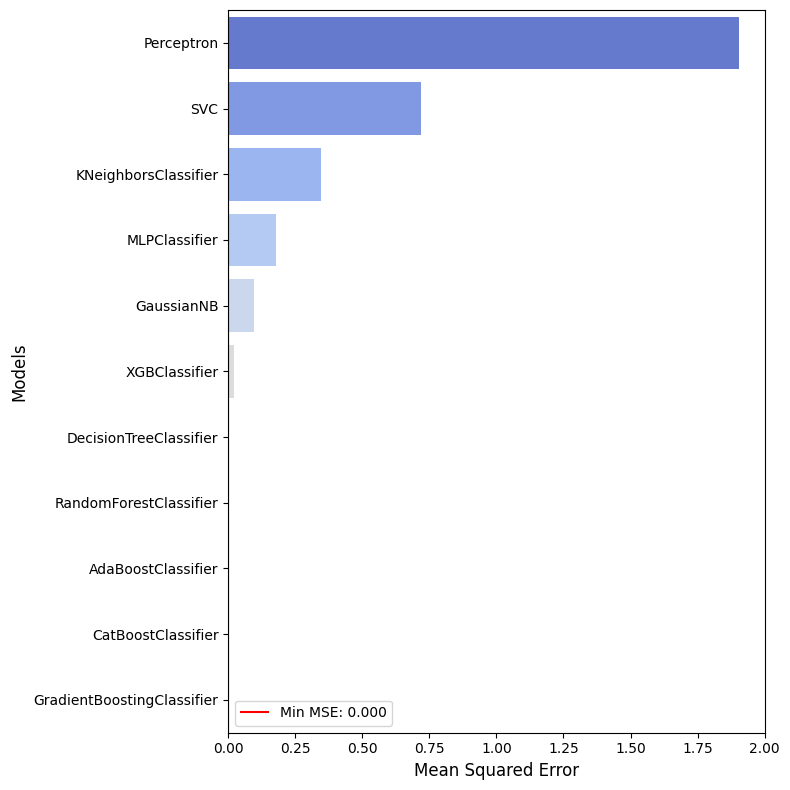

In [ ]:
mse_df = pd.DataFrame({'Model': [type(model).__name__ for model in models], 'Mean Squared Error': mse_scores})

mse_df = mse_df.sort_values(by='Mean Squared Error', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='Mean Squared Error', y='Model', data=mse_df, palette='coolwarm', ax=ax)

ax.set_xlabel('Mean Squared Error', fontsize=12)
ax.set_ylabel('Models', fontsize=12)

min_mse = mse_df['Mean Squared Error'].min()
ax.axvline(min_mse, color='red', label=f'Min MSE: {min_mse:.3f}', linestyle='solid')

ax.legend()
plt.tight_layout()
plt.show()

<ipython-input-17-e50eaa298dc9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision Score', y='Model', data=precision_df, palette='coolwarm', ax=ax)


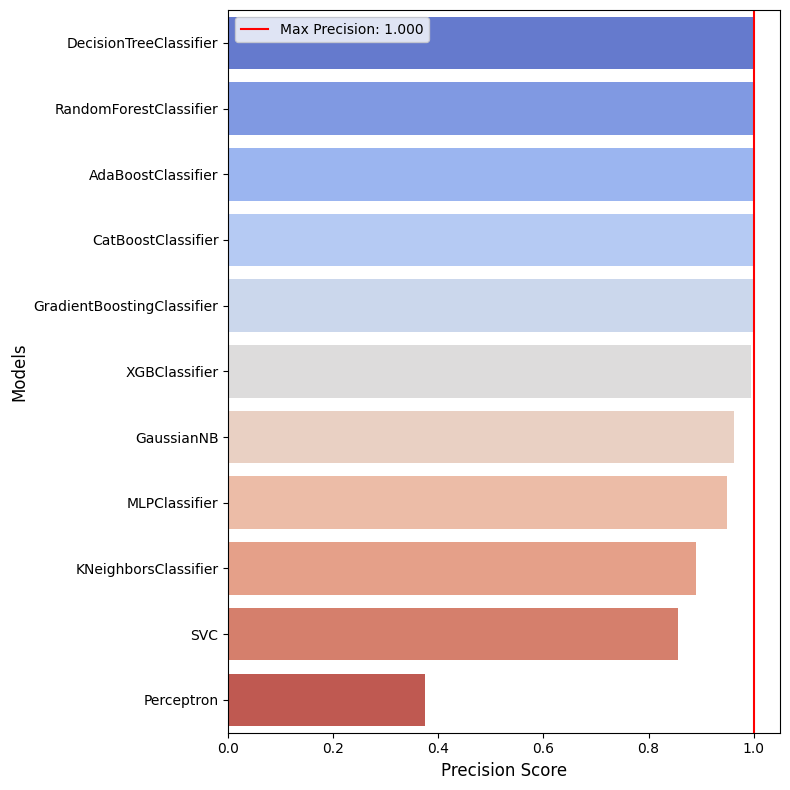

In [ ]:
precision_df = pd.DataFrame({'Model': [type(model).__name__ for model in models], 'Precision Score': precision_scores})

precision_df = precision_df.sort_values(by='Precision Score', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='Precision Score', y='Model', data=precision_df, palette='coolwarm', ax=ax)

ax.set_xlabel('Precision Score', fontsize=12)
ax.set_ylabel('Models', fontsize=12)

max_precision = precision_df['Precision Score'].max()
ax.axvline(max_precision, color='red', label=f'Max Precision: {max_precision:.3f}', linestyle='solid')

ax.legend()
plt.tight_layout()
plt.show()

<ipython-input-18-a997ee5c910c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall Score', y='Model', data=recall_df, palette='coolwarm', ax=ax)


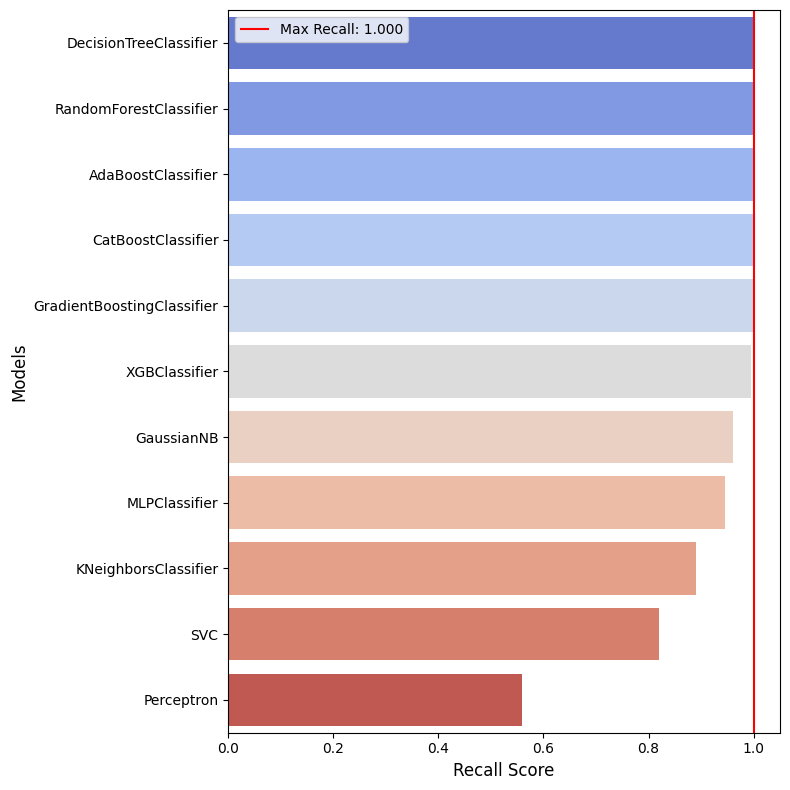

In [ ]:
recall_df = pd.DataFrame({'Model': [type(model).__name__ for model in models], 'Recall Score': recall_scores})

recall_df = recall_df.sort_values(by='Recall Score', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='Recall Score', y='Model', data=recall_df, palette='coolwarm', ax=ax)

ax.set_xlabel('Recall Score', fontsize=12)
ax.set_ylabel('Models', fontsize=12)

max_recall = recall_df['Recall Score'].max()
ax.axvline(max_recall, color='red', label=f'Max Recall: {max_recall:.3f}', linestyle='solid')

ax.legend()
plt.tight_layout()
plt.show()

<ipython-input-19-5393a46c5e80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Model', data=f1_df, palette='coolwarm', ax=ax)


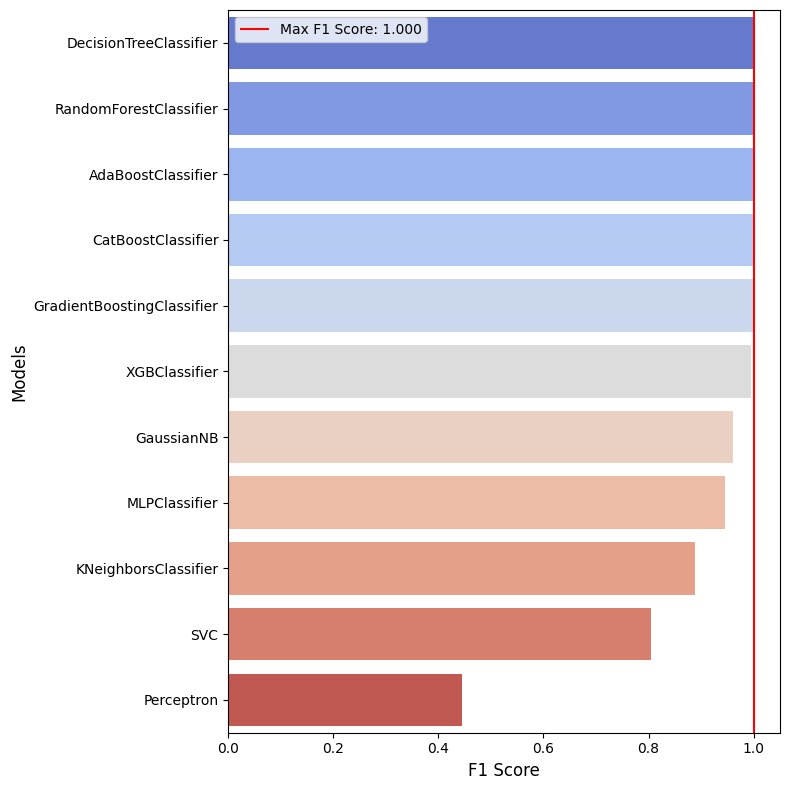

In [ ]:
f1_df = pd.DataFrame({'Model': [type(model).__name__ for model in models], 'F1 Score': f1_scores})

f1_df = f1_df.sort_values(by='F1 Score', ascending=False)


fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='F1 Score', y='Model', data=f1_df, palette='coolwarm', ax=ax)

ax.set_xlabel('F1 Score', fontsize=12)
ax.set_ylabel('Models', fontsize=12)

max_f1 = f1_df['F1 Score'].max()
ax.axvline(max_f1, color='red', label=f'Max F1 Score: {max_f1:.3f}', linestyle='solid')

ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
tables_info = pd.DataFrame({
    'Model': [
        'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier',
        'RandomForestClassifier', 'AdaBoostClassifier', 'GaussianNB', 'MLPClassifier',
        'XGBClassifier', 'CatBoostClassifier', 'Perceptron', 'GradientBoostingClassifier'
    ],
    'Accuracy': accuracy_scores,
    'R-squared': r2_scores,
    'Mean Squared Error': mse_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

tables_info = tables_info.sort_values(by='Accuracy', ascending=False)
table = tabulate(tables_info, headers='keys', tablefmt='grid')
print(table)

+----+----------------------------+------------+-------------+----------------------+-------------+----------+------------+
|    | Model                      |   Accuracy |   R-squared |   Mean Squared Error |   Precision |   Recall |   F1 Score |
+====+============================+============+=============+======================+=============+==========+============+
|  2 | DecisionTreeClassifier     |      1     |    1        |                0     |    1        |    1     |   1        |
+----+----------------------------+------------+-------------+----------------------+-------------+----------+------------+
|  3 | RandomForestClassifier     |      1     |    1        |                0     |    1        |    1     |   1        |
+----+----------------------------+------------+-------------+----------------------+-------------+----------+------------+
|  4 | AdaBoostClassifier         |      1     |    1        |                0     |    1        |    1     |   1        |
+----+--


KNeighborsClassifier SHAP Visualization:


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

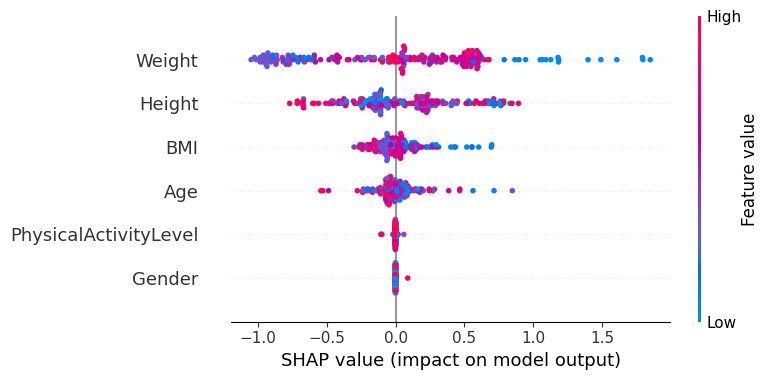

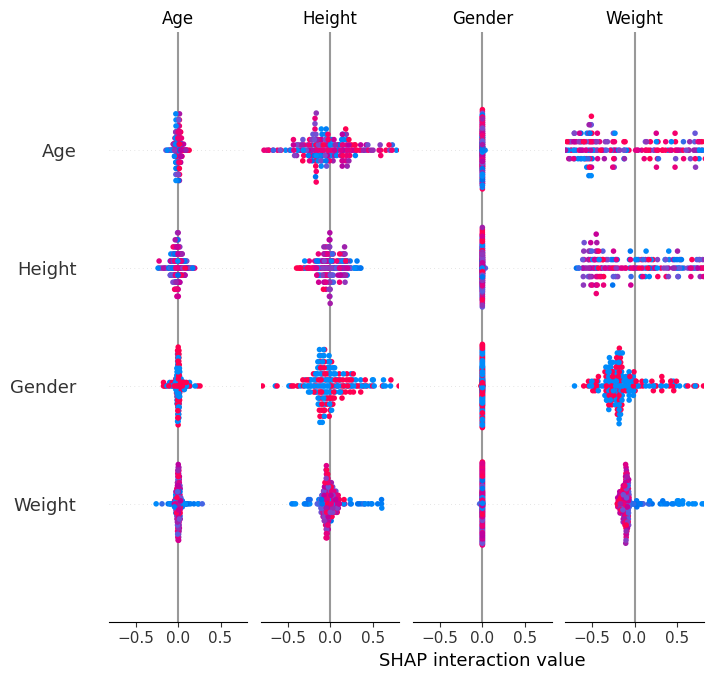


SVC SHAP Visualization:


  0%|          | 0/200 [00:00<?, ?it/s]

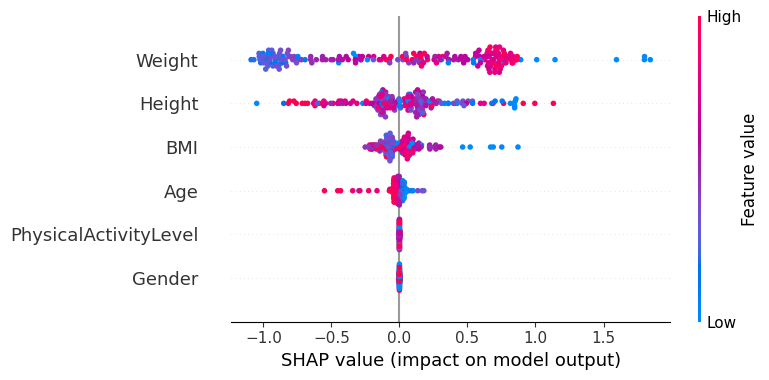


DecisionTreeClassifier SHAP Visualization:


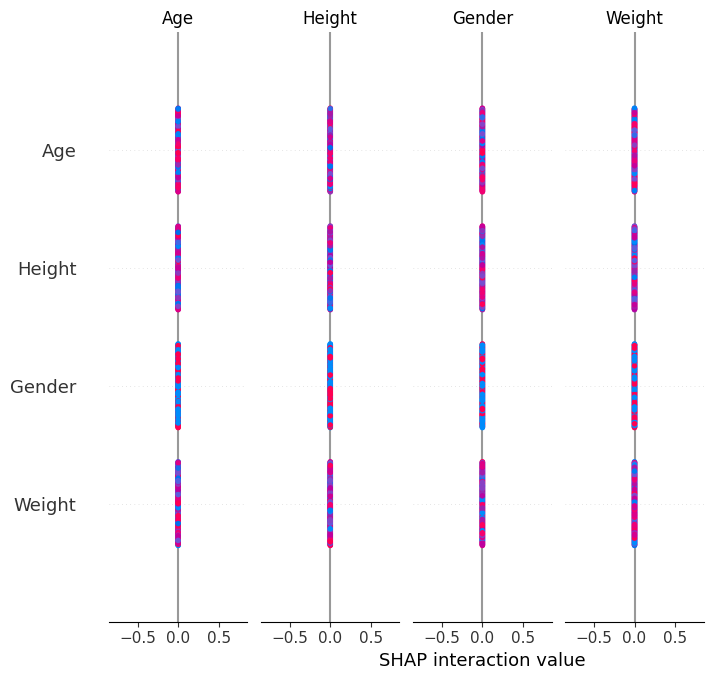


RandomForestClassifier SHAP Visualization:


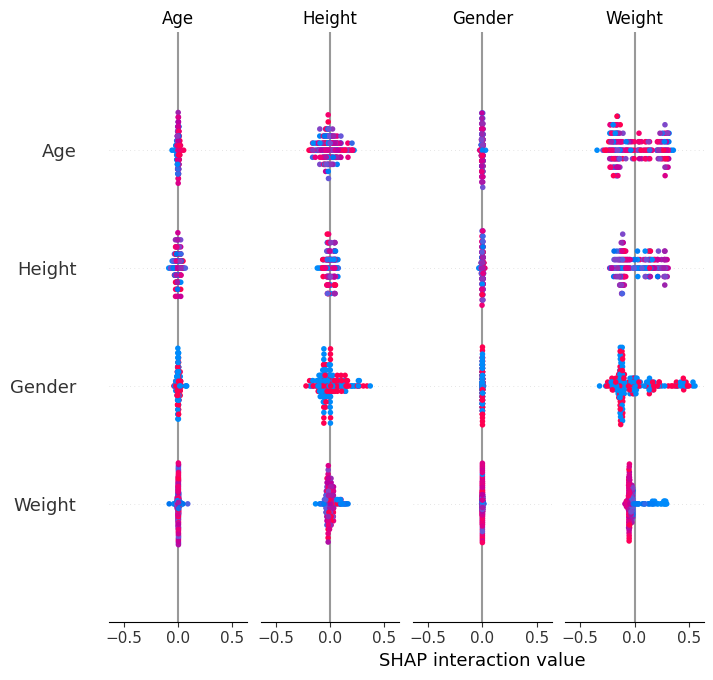


AdaBoostClassifier SHAP Visualization:


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

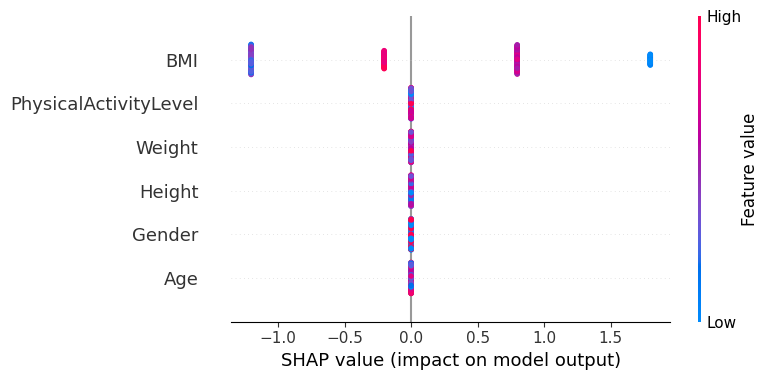

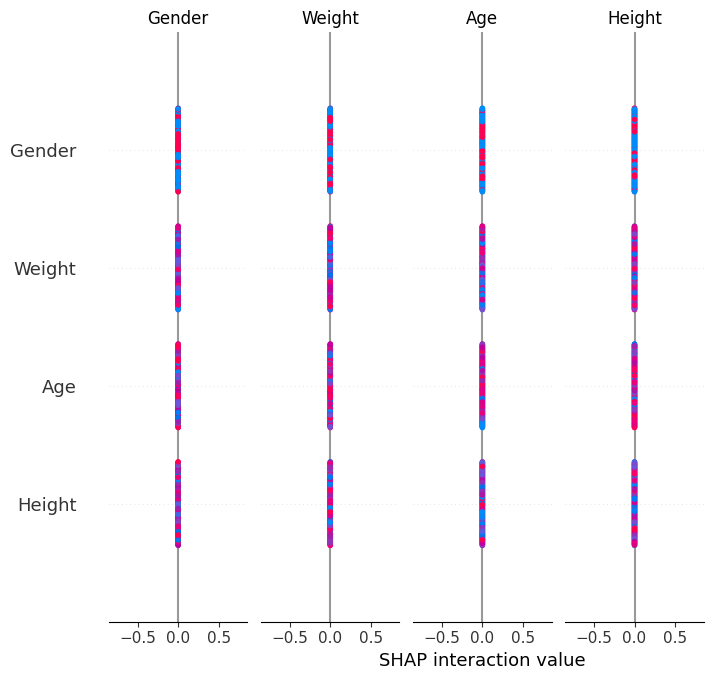


GaussianNB SHAP Visualization:


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

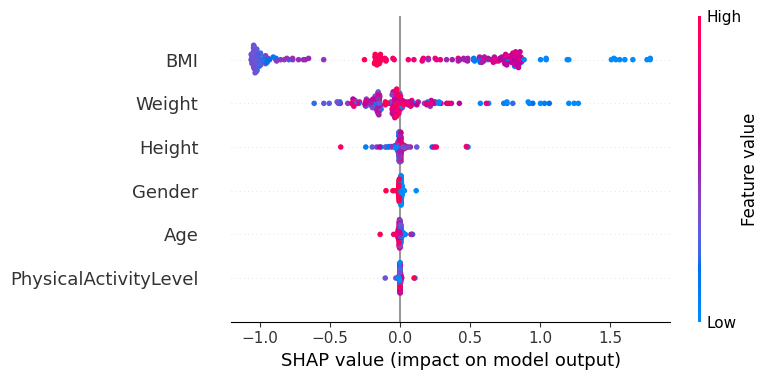

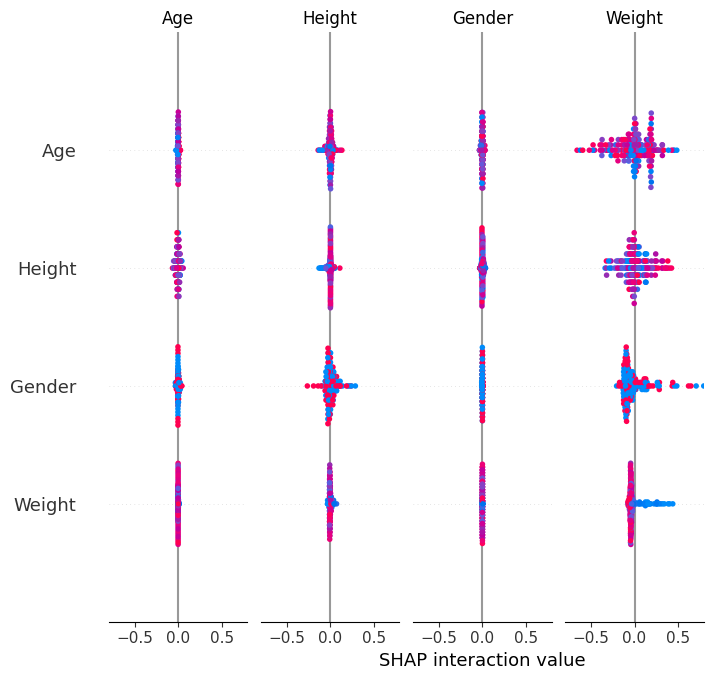

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



MLPClassifier SHAP Visualization:


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

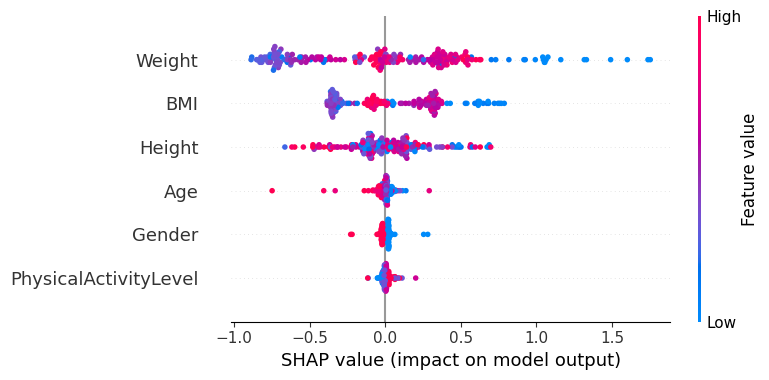

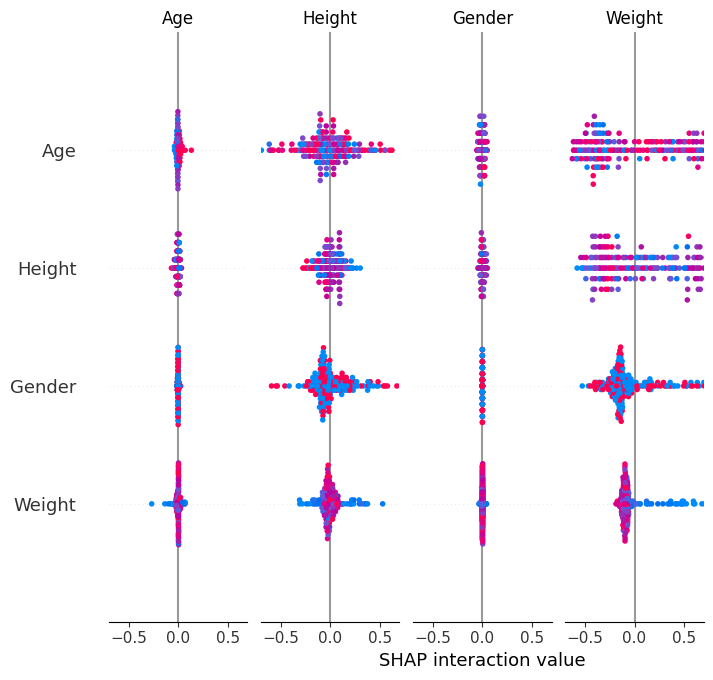


XGBClassifier SHAP Visualization:


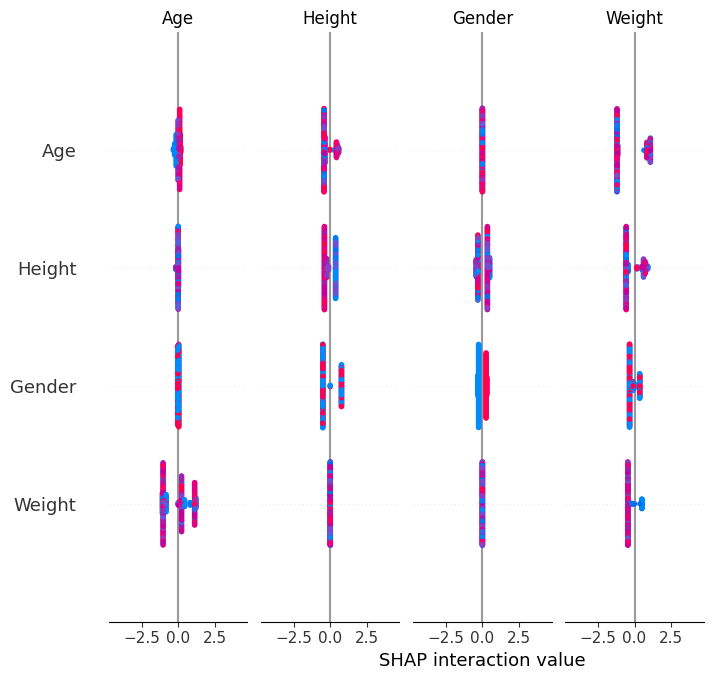


CatBoostClassifier SHAP Visualization:


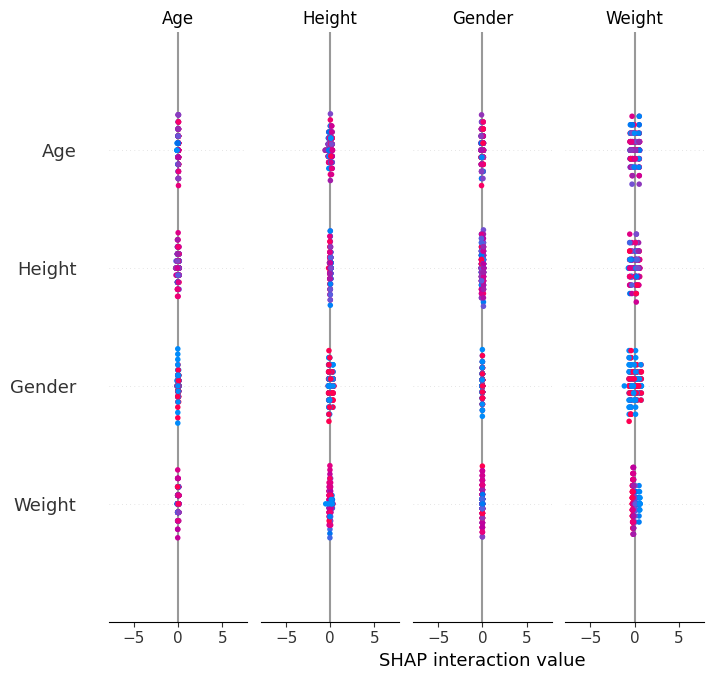


Perceptron SHAP Visualization:


  0%|          | 0/200 [00:00<?, ?it/s]

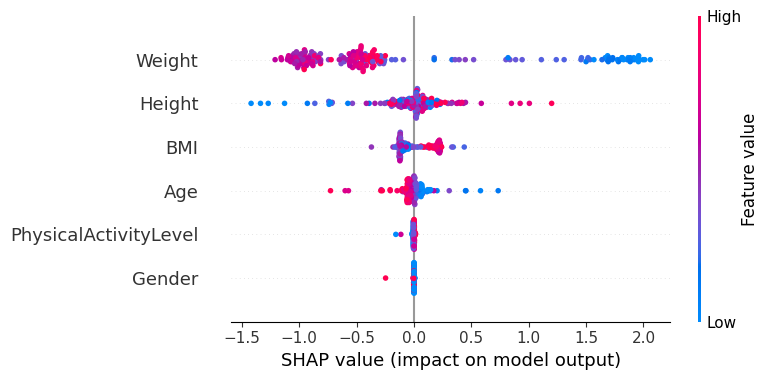


GradientBoostingClassifier SHAP Visualization:


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

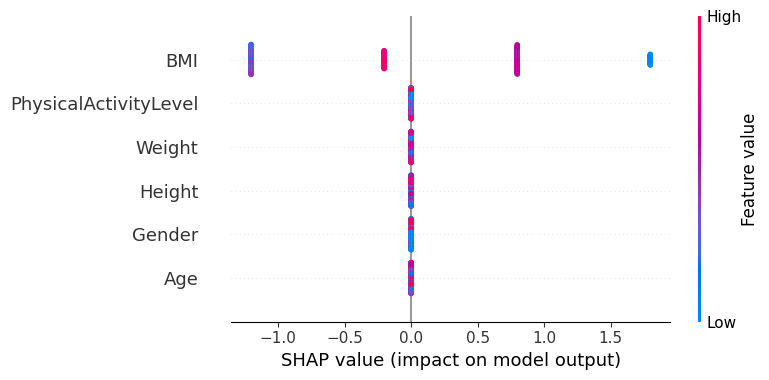

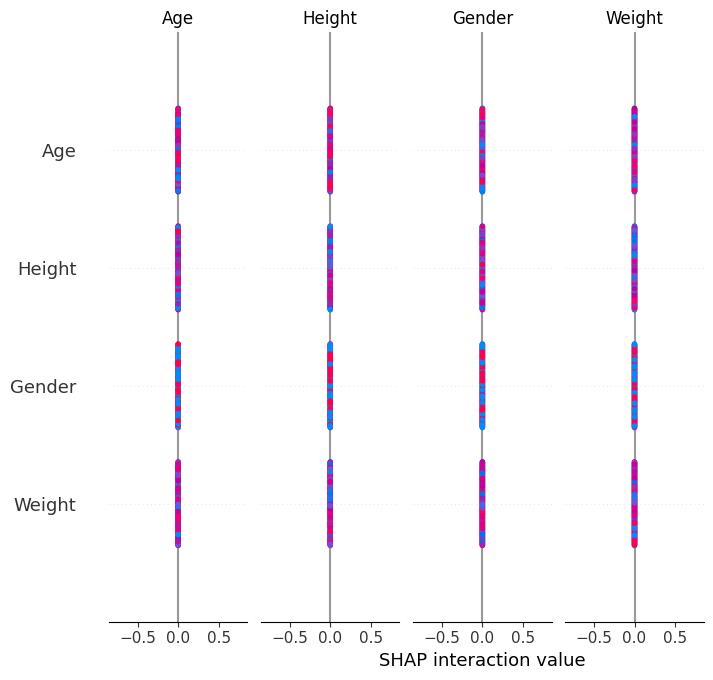

In [ ]:
!pip install shap
import shap
from sklearn.linear_model import LogisticRegression

import numpy as np

def visualize_shap(model, X_train, X_test, y_train):
    if isinstance(model, (SVC, Perceptron)):
        explainer = shap.KernelExplainer(model.predict, X_train)
    elif isinstance(model, (RandomForestClassifier, DecisionTreeClassifier, XGBClassifier, CatBoostClassifier)):
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.KernelExplainer(model.predict, X_train)

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test)

    # Visualize SHAP values
    shap.summary_plot(shap_values, X_test)


# Apply SHAP for each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{type(model).__name__} SHAP Visualization:")
    if isinstance(model, (RandomForestClassifier, DecisionTreeClassifier, XGBClassifier, CatBoostClassifier)):
      shap_values = shap.TreeExplainer(model).shap_values(X_test)
      shap.summary_plot(shap_values, X_test)
    elif isinstance(model, (SVC, Perceptron)):
      shap_values = shap.KernelExplainer(model.predict, X_train).shap_values(X_test)
      shap.summary_plot(shap_values, X_test)
    else:
      shap_values = shap.KernelExplainer(model.predict, X_train).shap_values(X_test)
      shap_inter = shap.KernelExplainer(model.predict_proba, X_train).shap_values(X_test)
      shap.summary_plot(shap_values, X_test)
      shap.summary_plot(shap_inter, X_test)

    #visualize_shap(model, X_train, X_test, y_train)

